# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# setting path

path = r'/Users/brad/Desktop/Instacart Basket Analysis'

In [4]:
# Importing the orders_products_customers_merged pkl file

merged = pd.read_pickle(os.path.join(path, '/Users/brad/Desktop/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merge.pkl'))
print(path)

/Users/brad/Desktop/Instacart Basket Analysis


# Q2 -Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Apply function to display all columns wihtin the dataframe
pd.set_option('display.max_columns', None)

In [6]:
# Check the output
merged.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income
0,0,0,2539329,1,prior,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,1,2398795,1,prior,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,2,473747,1,prior,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,3,2254736,1,prior,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,4,431534,1,prior,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# Check the dimensions
merged.shape

(32434212, 36)

There are security implications as customer names are included in the dataframe. To address this the first_name and surname columns will be dropped as well as unammed columns

In [8]:
# Drop 'first_name' and 'surname' columns
merged = merged.drop(columns = ['first_name', 'surname', 'Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0_y'])

In [9]:
# Check the output
merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Q3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [10]:
# Check frequency of values within 'state' column
merged['state'].value_counts(dropna = False)


state
Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
New York                636697
Nevada                  636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mi

States will now be classified according to regions according to the list - https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [11]:
# Create 'regions' list to assign a region for each state
regions = []

for value in merged['state']:
  if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
    regions.append('Northeast')
  elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
    regions.append('Midwest')
  elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico']:
    regions.append('West')
  else:
    regions.append('South')

In [12]:
# Create 'regions' column within dataframe
merged['regions'] = regions

In [13]:
# Check the output
merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,dependants,marital_status,income,regions
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [14]:
# Check frequency of values within 'regions' column
merged['regions'].value_counts()

regions
South        14014892
Midwest       7603810
Northeast     5728347
West          5087163
Name: count, dtype: int64

# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [15]:
# Create crosstab between 'regions' and 'spending_flag' columns
crosstab_reg_spend = pd.crosstab(merged['regions'], merged['spending_flag'], dropna = False)

In [16]:
# Check the output
crosstab_reg_spend

spending_flag,High spender,Low spender
regions,,
Midwest,156129,7447681
Northeast,108343,5620004
South,274999,13739893
West,95990,4991173


Midwest:
Total = 7 603 810
% of low spenders = 97.95%
% of high spenders = 2,05%

Northeast:
Total = 5 728 347
% of low spenders = 98.1%
% of high spenders = 1.9%

South: 
Total = 14 014 892
% of low spenders = 98,04%
% of high spenders = 1.96%

West:
Total = 5 087 163
% of low spenders = 98.1%
% of high spenders = 1.9%

The spending patterns are largely uniform across the regions, with a significant amount of spenders falling inot the low spender category. However, the Midwest region bost the highest amount of high spenders comapred to the other regions.

# Q4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
 # Set first condition (low-activity customers if orders number <5)0
merged.loc[merged['max_order'] < 5, 'user_activity_flag'] = 'Low activity'

In [18]:
 # Set second condition (regular customers if orders number >=5)
merged.loc[merged['max_order'] >= 5, 'user_activity_flag'] = 'Normal activity'

In [19]:
# Check the output
merged['user_activity_flag'].value_counts(dropna = False)

user_activity_flag
Normal activity    30992664
Low activity        1441548
Name: count, dtype: int64

In [20]:
merged

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,dependants,marital_status,income,regions,user_activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,156685,106143,prior,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,both,Least busy,Slowest days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,South,Normal activity
32434208,484769,66343,prior,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Regularly busy,Regularly days,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32434209,1561557,66343,prior,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Regularly busy,Busiest days,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32434210,276317,66343,prior,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Regularly busy,Regularly days,Most orders,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity


Now that that flags have been set, we can now remove the low-activity customers from our dataframe by creating a subset

In [21]:
# Create subset df with only low-activity customers
df_low_activity = merged[merged['user_activity_flag'] == 'Low activity']

In [22]:
# Check the output
df_low_activity['user_activity_flag'].value_counts()

user_activity_flag
Low activity    1441548
Name: count, dtype: int64

In [23]:
# Create subset df with only normal-activity customers
df_normal_activity = merged[merged['user_activity_flag'] == 'Normal activity']

In [24]:
# Check the output
df_normal_activity['user_activity_flag'].value_counts()

user_activity_flag
Normal activity    30992664
Name: count, dtype: int64

In [25]:
# Check the total length of new dataframes
len(df_normal_activity) + len(df_low_activity)

32434212

In [26]:
# Exporting new dataframes (df_normal)

df_normal_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'subset_customers_norm_activity.pkl'))

In [27]:
# Export new dataframes (df_low)

df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'subset_customers_low_activity.pkl'))

# Q5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

We need to merge the department_wrangled subset to that of our new subset for normal_activity

In [29]:
# Import 'departments_wrangled' dataset
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [30]:
# Check output
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [31]:
# Change 'Unnamed:0' column name to 'department_id'
df_departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [32]:
# Check the output
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [34]:
# Merge df_active_customers and df_departments on a key column 'department_id'
df_normal_activity = df_normal_activity.merge(df_departments, on = 'department_id')

In [35]:
# Check the output
df_normal_activity.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,dependants,marital_status,income,regions,user_activity_flag,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity,beverages


In [36]:
# Export merged dataframe as 'active_customers_departments_merged.pkl'
df_normal_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_customers_departments_merged.pkl' ))

# Now we can create customer profiles

Profile 1 - Age

In [38]:
# Descriptive statistics for 'age' column 
df_normal_activity ['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Based on these descriptive statistics, the following groups will be created for segmentation: 

18-29 years
30-49 years
50-64 years
65-81 years

In [39]:
# Create a flag for 18-29 years old
df_normal_activity.loc[(df_normal_activity['age'] >=18) & (df_normal_activity['age'] <30), 'age_group'] = '18-29 years old'

In [40]:
# Create a flag for 30-49 years old
df_normal_activity.loc[(df_normal_activity['age'] >=30) & (df_normal_activity['age'] <50), 'age_group'] = '30-49 years old'

In [41]:
# Create a flag for 50-64 years old
df_normal_activity.loc[(df_normal_activity['age'] >=50) & (df_normal_activity['age'] <65), 'age_group'] = '50-64 years old'

In [42]:
# Create a flag for 65-81 years old
df_normal_activity.loc[(df_normal_activity['age'] >=65) & (df_normal_activity['age'] <=81), 'age_group'] = '65-81 years old'

In [43]:
# Check the output
df_normal_activity['age_group'].value_counts().sort_index()

age_group
18-29 years old    5823021
30-49 years old    9739204
50-64 years old    7227693
65-81 years old    8202746
Name: count, dtype: int64

It is now possible to create a distribution chart for the age groups

(array([0, 1, 2, 3]),
 [Text(0, 0, '18-29 years old'),
  Text(1, 0, '30-49 years old'),
  Text(2, 0, '50-64 years old'),
  Text(3, 0, '65-81 years old')])

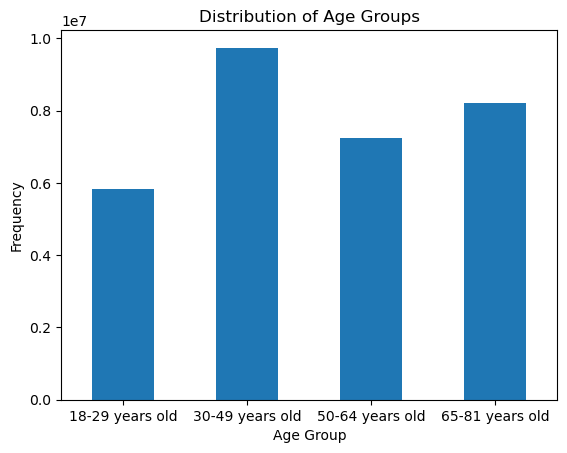

In [46]:
# Create distribution chart for 'age_groups'
bar_age_group_distr = df_normal_activity['age_group'].value_counts().sort_index().plot.bar()

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')

plt.xticks(rotation = 360)

In [47]:
# Exporting the bar chart
bar_age_group_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_distrib.png'),bbox_inches='tight')

Next we can aggregate order_numbers and prices for the age group segments

In [48]:
# Aggregate 'order_number' and 'prices' for age groups
df_normal_activity.groupby('age_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices              
                        mean max min       mean      max  min
age_group                                                    
18-29 years old    17.803851  99   1  12.199361  99999.0  1.0
30-49 years old    17.891023  99   1  12.079181  99999.0  1.0
50-64 years old    17.837049  99   1  11.725332  99999.0  1.0
65-81 years old    17.783953  99   1  11.758945  99999.0  1.0

Creating profiles based on income

In [49]:
# Descriptive statistics for 'age' column 
df_normal_activity['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

Based on these descriptive statistics, the following groups will be created for segmentation: 

low = <65,000,
medium = 65,001-145,000,
high = >145,001+

In [50]:
# Create low income flag
df_normal_activity.loc[df_normal_activity['income'] <= 65000, 'income_group'] = 'Low income'

In [51]:
# Create medium income flag
df_normal_activity.loc[(df_normal_activity['income'] > 65000) & (df_normal_activity['income'] <= 145000), 'income_group'] = 'Medium income'

In [52]:
# Create high income flag
df_normal_activity.loc[df_normal_activity['income'] > 145000, 'income_group'] = 'High income'

In [53]:
# Check the output
df_normal_activity['income_group'].value_counts()

income_group
Medium income    19093527
Low income        7114760
High income       4784377
Name: count, dtype: int64

Now creating a distribution chart for income levels

(array([0, 1, 2]),
 [Text(0, 0, 'Medium income'),
  Text(1, 0, 'Low income'),
  Text(2, 0, 'High income')])

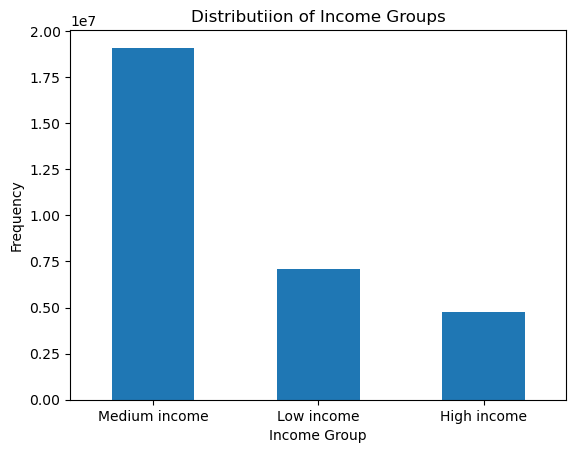

In [54]:
# Create distribution chart for 'income_group'
bar_income_group_distr = df_normal_activity['income_group'].value_counts().plot.bar()

plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Distributiion of Income Groups')

plt.xticks(rotation = 360)

In [55]:
# Export bar chart
bar_income_group_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_distrib.png'),bbox_inches='tight')

Aggregating prices and orders per income groups

In [56]:
# Aggregate 'order_number' and 'prices' for income groups
df_normal_activity.groupby('income_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices              
                      mean max min       mean      max  min
income_group                                               
High income      18.002202  99   1  28.502301  99999.0  1.0
Low income       17.432544  99   1   7.256489  14900.0  1.0
Medium income    17.940991  99   1   9.526137  99999.0  1.0

In [ ]:
Creating profiles based on marital status and number of dependents

In [58]:
# Frequency table for 'fam_status' column 
df_normal_activity['marital_status'].value_counts()

marital_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

In [60]:
# Frequency table for 'n_dependants' column 
df_normal_activity['dependants'].value_counts().sort_index()

dependants
0    7747032
1    7725981
2    7740199
3    7779452
Name: count, dtype: int64

In [61]:
# Create a crosstab between 'marital_status' and 'dependants'
cross_marital_dependant = pd.crosstab(df_normal_activity['marital_status'], df_normal_activity['dependants'], dropna = False)

In [62]:
# Check the output
cross_marital_dependant

dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2647761,0,0,0
living with parents and siblings,0,508439,485157,489015
married,0,7217542,7255042,7290437
single,5099271,0,0,0


Based on these descriptive statistics, the following groups will be created for segmentation: 

single without dependants (divorced/widowed and single)
single with dependants (living with parents and siblings with dependants)
married with dependants (married with dependants)

In [63]:
# Create 'single without dependants' flag
df_normal_activity.loc[df_normal_activity['marital_status'].isin(['divorced/widowed','single']), 'marital_dependant_group'] = 'Single without dependants'

In [64]:
# Create 'single with dependants' flag
df_normal_activity.loc[df_normal_activity['marital_status'] == 'living with parents and siblings', 'marital_dependant_group'] = 'Single with dependants'

In [65]:
# Create 'married with dependants' flag
df_normal_activity.loc[df_normal_activity['marital_status'] == 'married', 'marital_dependant_group'] = 'Married with dependants'

In [66]:
# Check the output
df_normal_activity['marital_dependant_group'].value_counts()

marital_dependant_group
Married with dependants      21763021
Single without dependants     7747032
Single with dependants        1482611
Name: count, dtype: int64

Creating a distribution chart for marital_dependent_group

(array([0, 1, 2]),
 [Text(0, 0, 'Single with dependants'),
  Text(1, 0, 'Single without dependants'),
  Text(2, 0, 'Married with dependants')])

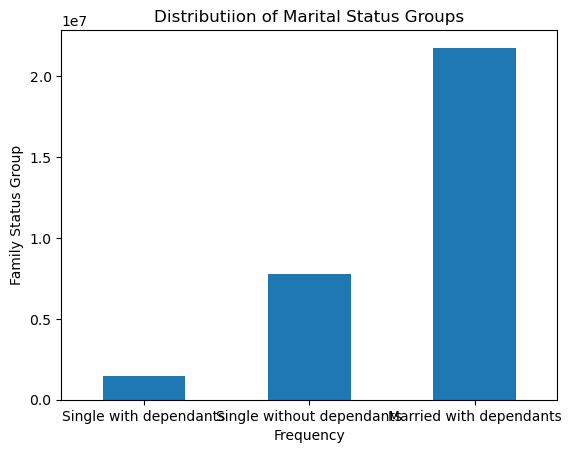

In [68]:
# Create distribution chart for 'martial_dependant_group'
bar_marital_dep_group_distr = df_normal_activity['marital_dependant_group'].value_counts().sort_values().plot.bar()

plt.ylabel('Family Status Group')
plt.xlabel('Frequency')
plt.title('Distributiion of Marital Status Groups')

plt.xticks(rotation = 360)

In [69]:
# Export distribution chart
bar_marital_dep_group_distr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_dep_group_distrib.png'),bbox_inches='tight')

Aggregating profile based on prices and orders for marital dependent groups

In [70]:
# Aggregate 'order_number' and 'prices' for marital_dependant_group
df_normal_activity.groupby('marital_dependant_group').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices              
                                  mean max min       mean      max  min
marital_dependant_group                                                
Married with dependants      17.778091  99   1  11.945319  99999.0  1.0
Single with dependants       18.000917  99   1  10.892382  99999.0  1.0
Single without dependants    17.957993  99   1  12.103485  99999.0  1.0

# Profiles based on departments

In [71]:
# Frequency of products purchased by department
df_normal_activity['department'].value_counts()

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Number of Products Purchased per Department')

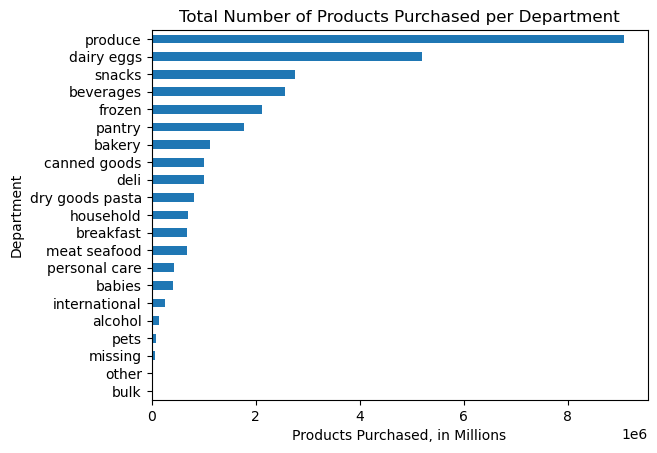

In [72]:
# Creating a bar chart to show products purchased per department
bar_department_ords = df_normal_activity['department'].value_counts().sort_values().plot.barh()

plt.ylabel('Department')
plt.xlabel('Products Purchased, in Millions')
plt.title('Total Number of Products Purchased per Department')

In [73]:
# Export bar chart
bar_department_ords.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_orders.png'),bbox_inches='tight')

In [74]:
# Check income per department
df_normal_activity.groupby('department').prices.sum().sort_values(ascending = False)

department
dairy eggs         171650100.4
produce             72455790.7
beverages           19759202.3
frozen              16431750.7
pantry              14289860.7
snacks              11827920.3
meat seafood        10999037.0
bakery               8852224.6
deli                 7813188.1
canned goods         7637778.5
dry goods pasta      6042181.4
breakfast            5470900.4
household            5164912.0
personal care        3394733.1
babies               3133096.4
international        1965702.9
alcohol              1179302.3
pets                  734083.7
missing               560933.3
bulk                  279212.8
other                 239569.2
Name: prices, dtype: float64

Text(0.5, 1.0, 'Total Income by Department')

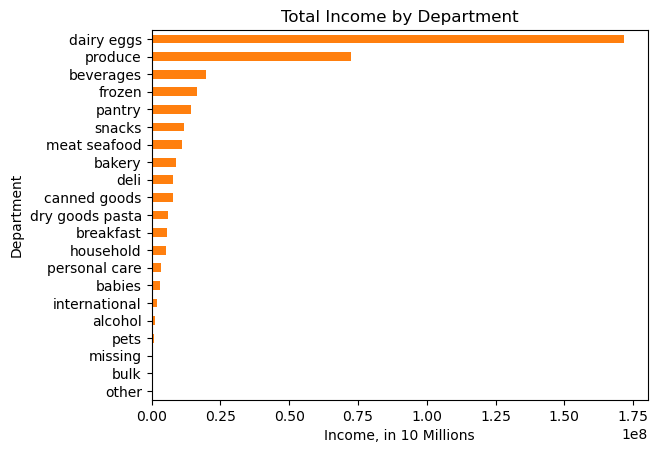

In [76]:
# Create bar chart to show income per department
bar_depart_income = df_normal_activity.groupby('department').prices.sum().sort_values(ascending = True).plot(kind = 'barh', color = 'tab:orange')

plt.ylabel('Department')
plt.xlabel('Income, in 10 Millions')
plt.title('Total Income by Department')

In [77]:
# Export bar chart
bar_depart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_income.png'),bbox_inches='tight')

Text(0.5, 1.0, 'Average Prices by Department')

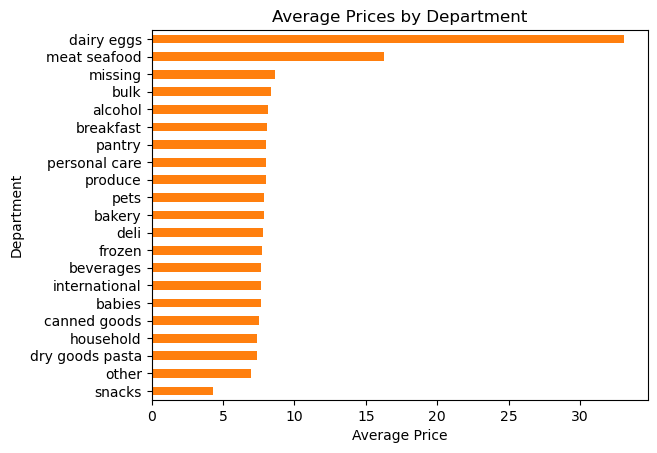

In [78]:
# Create bar chart to show average prices per department
bar_depart_avg_price = df_normal_activity.groupby('department').prices.mean().sort_values(ascending = True).plot(kind = 'barh', color = 'tab:orange')

plt.ylabel('Department')
plt.xlabel('Average Price')
plt.title('Average Prices by Department')

In [79]:
# Export bar chart
bar_depart_avg_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_avg_prices.png'),bbox_inches='tight')

Aggregating price and orders for departments

In [80]:
# Aggregate 'order_number' and 'prices' for departments
df_normal_activity.groupby('department').agg({'order_number': ['mean','max','min'], 'prices': ['mean','max','min']})

order_number             prices              
                        mean max min       mean      max  min
department                                                   
alcohol            16.031865  99   1   8.151446     15.0  1.0
babies             19.867090  99   1   7.634399     15.0  1.0
bakery             17.865992  99   1   7.868462     15.0  1.0
beverages          17.901457  99   1   7.682624     15.0  1.0
breakfast          17.453395  99   1   8.068044     14.9  1.0
bulk               20.797555  99   1   8.346919     14.1  1.4
canned goods       16.933858  99   1   7.546660     15.0  1.0
dairy eggs         18.322228  99   1  33.061592  99999.0  1.0
deli               17.144802  99   1   7.783347     15.0  1.0
dry goods pasta    16.633019  99   1   7.349370     15.0  1.0
frozen             16.160536  99   1   7.738627     15.0  1.0
household          16.438892  99   1   7.379943     15.0  1.0
international      17.174694  99   1   7.678797     15.0  1.0
meat seafood       16.576855  99   1  16.300062     25.0  8.0
missing            24.281327  99   1   8.660655     15.0  1.0
other              18.096481  99   1   6.961995     15.0  1.1
pantry             17.328072  99   1   8.014940     20.0  1.0
personal care      16.933725  99   1   7.998617     15.0  1.0
pets               15.996153  99   1   7.887860     15.0  1.0
produce            18.495724  99   1   7.980349     15.0  1.0
snacks             17.830354  99   1   4.275555      7.0  1.6

# Creating Crosstabs and Visualizations

Department and Age Group

In [81]:
# Creating a crosstab between 'age_group' and 'department'
cross_age_department = pd.crosstab(df_normal_activity['department'], df_normal_activity['age_group'].sort_values(), dropna = False)

In [82]:
# Check the output
cross_age_department

age_group,18-29 years old,30-49 years old,50-64 years old,65-81 years old
department,,,,
alcohol,27942,46162,33850,36720
babies,77758,130770,95660,106204
bakery,211198,353552,263360,296916
beverages,477658,803198,607050,684028
breakfast,129590,212261,159117,177127
bulk,6414,10594,7498,8945
canned goods,192170,316357,236038,267509
dairy eggs,978948,1641477,1199392,1372011
deli,188533,315711,234391,265199


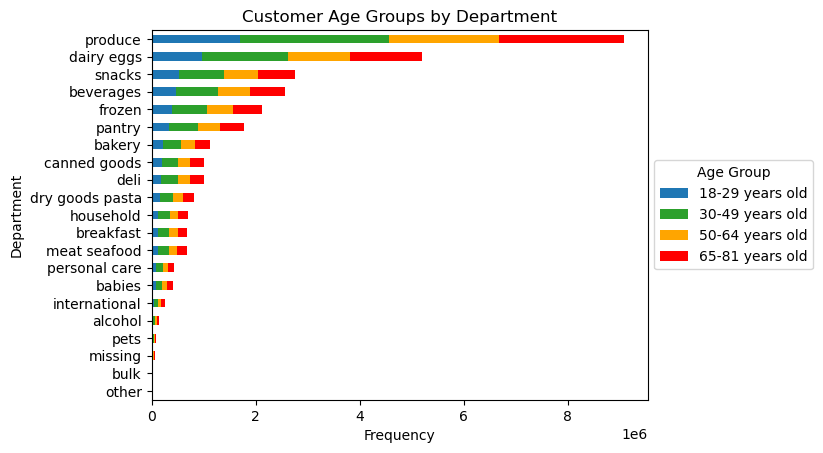

In [83]:
# Create stacked bar chart for age_group by department

bar_age_group_dep = cross_age_department.sort_values(by='30-49 years old', ascending=True).plot(kind='barh', stacked=True, color = ['tab:blue', 'tab:green', 'orange', 'red'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Customer Age Groups by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

In [84]:
# Exporting bar chart
bar_age_group_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_departments.png'),bbox_inches='tight')

Income Group and Department

In [85]:
# Create a crosstab between 'income_group' and 'department'
cross_income_department = pd.crosstab(df_normal_activity['department'], df_normal_activity ['income_group'].sort_values(), dropna = False)

In [86]:
# Checking the output
cross_income_department

income_group,High income,Low income,Medium income
department,,,
alcohol,27865,34386,82423
babies,66033,73943,270416
bakery,181647,243358,700021
beverages,382737,693636,1495561
breakfast,102705,175840,399550
bulk,4582,8787,20082
canned goods,163485,200464,648125
dairy eggs,812102,1125164,3254562
deli,154627,227449,621758


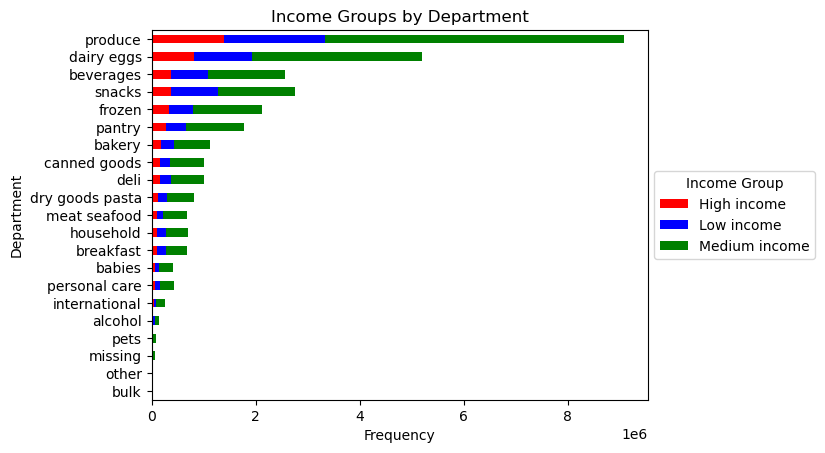

In [87]:
# Create stacked bar chart for income_group by department
bar_income_group_dep = cross_income_department.sort_values(by='Medium income', ascending=True).plot(kind='barh', stacked=True, color = ['red', 'blue', 'green'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Income Groups by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

In [88]:
# Export bar chart
bar_income_group_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_departments.png'),bbox_inches='tight')

marital dependent group and department

In [89]:
# Create a crosstab between 'marital_dependant_group' and 'department'
cross_marital_department = pd.crosstab(df_normal_activity['department'], df_normal_activity['marital_dependant_group'].sort_values(), dropna = False)

In [90]:
# Check the output
cross_marital_department

marital_dependant_group,Married with dependants,Single with dependants,Single without dependants
department,,,
alcohol,99442,8380,36852
babies,287683,19381,103328
bakery,788630,53910,282486
beverages,1807477,119108,645349
breakfast,476276,33494,168325
bulk,23818,1633,8000
canned goods,712577,48477,251020
dairy eggs,3642585,251028,1298215
deli,702333,48119,253382


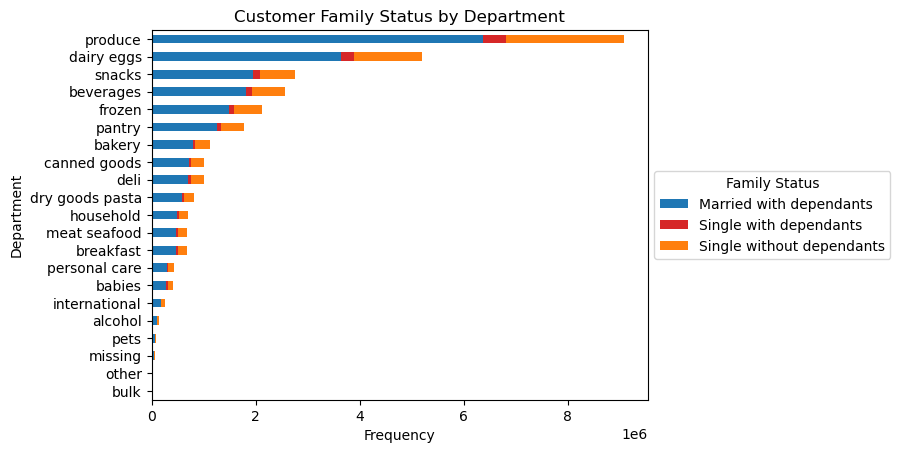

In [92]:
# Create stacked bar chart for marital_dependant_group by department
bar_marital_group_dep = cross_marital_department.sort_values(by='Married with dependants', ascending=True).plot(kind='barh', stacked=True, color = ['tab:blue', 'tab:red', 'tab:orange'])
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Customer Family Status by Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Family Status')

In [93]:
# Export bar chart
bar_marital_group_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_group_departments.png'),bbox_inches='tight')

In [ ]:
Age groups and regions

In [94]:
# Create a crosstab between 'age_group' and 'regions'
cross_age_region = pd.crosstab(df_normal_activity['regions'], df_normal_activity['age_group'].sort_values(), dropna = False)

In [95]:
# Check the output
cross_age_region

age_group,18-29 years old,30-49 years old,50-64 years old,65-81 years old
regions,,,,
Midwest,1356946,2304202,1701087,1905472
Northeast,1025132,1708764,1249908,1486264
South,2524994,4206302,3137647,3524345
West,915949,1519936,1139051,1286665


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

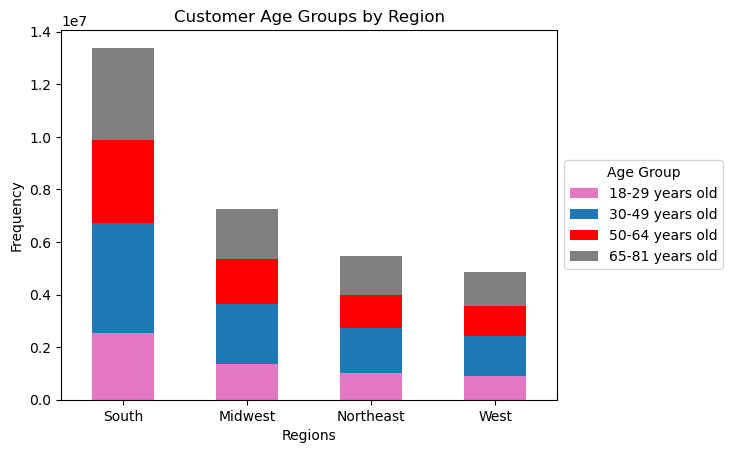

In [96]:
# Create stacked bar chart for age_group by region
bar_age_group_reg = cross_age_region.sort_values(by='30-49 years old', ascending=False).plot(kind='bar', stacked=True, color = ['tab:pink', 'tab:blue', 'red', 'grey'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Age Groups by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Age Group')

plt.xticks(rotation = 360)

In [97]:
# Export bar chart
bar_age_group_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_regions.png'),bbox_inches='tight')

Income groups by region

In [98]:
# Create a crosstab between 'income_group' and 'regions'
cross_income_reg = pd.crosstab(df_normal_activity['regions'], df_normal_activity['income_group'].sort_values(), dropna = False)

In [99]:
# Check the output
cross_income_reg

income_group,High income,Low income,Medium income
regions,,,
Midwest,1127949,1640905,4498853
Northeast,843378,1248289,3378401
South,2062971,3112696,8217621
West,750079,1112870,2998652


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

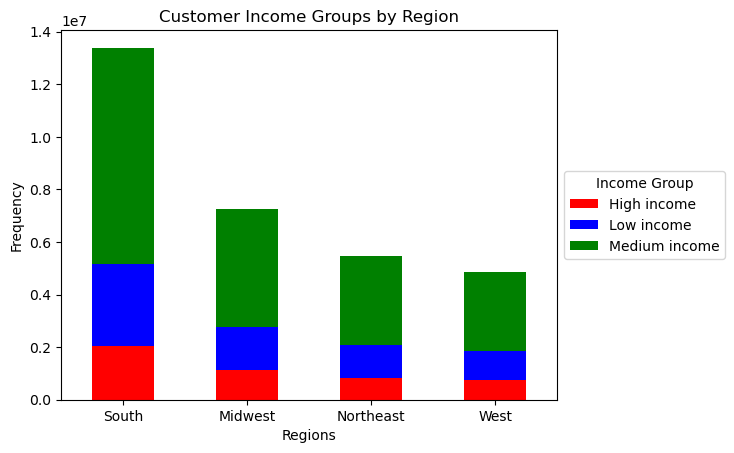

In [100]:
# Create stacked bar chart for regions by income_group
bar_income_group_reg = cross_income_reg.sort_values(by='Medium income', ascending=False).plot(kind='bar', stacked=True, color = ['red', 'blue', 'green'])

plt.ylabel('Frequency')
plt.xlabel('Regions')
plt.title('Customer Income Groups by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = 'Income Group')

plt.xticks(rotation = 360)

In [101]:
# Export bar chart
bar_income_group_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_regions.png'),bbox_inches='tight')

Regions and Departments

In [102]:
# Create a crosstab between 'department' and 'regions'
cross_depart_reg = pd.crosstab(df_normal_activity['department'], df_normal_activity['regions'].sort_values(), dropna = False)

In [103]:
# Check the output
cross_depart_reg

regions,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,62377,23211
babies,95741,72712,180341,61598
bakery,262614,200136,485400,176876
beverages,598990,462931,1108619,401394
breakfast,157781,119327,292628,108359
bulk,7929,5599,14618,5305
canned goods,237459,176936,436718,160961
dairy eggs,1215821,917293,2243978,814736
deli,234464,178398,433688,157284


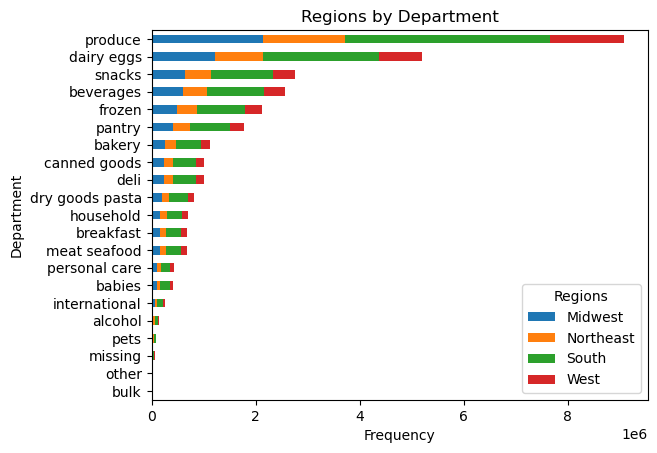

In [104]:
# Create stacked bar chart for region by department

bar_depart_reg = cross_depart_reg.sort_values(by='South', ascending=True).plot(kind='barh', stacked=True)
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.title('Regions by Department')
plt.legend(title = 'Regions')

In [105]:
# Export bar chart
bar_depart_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments_regions.png'),bbox_inches='tight')

# 10. Exporting Final Dataframe

In [106]:
# Export active_customers_departs dataframe as 'active_customers_departments_merged_final.pkl'
df_normal_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_departments_merged_final.pkl'))